In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

cancer = load_breast_cancer()

data = cancer.data
target = cancer.target
feature_names = cancer.feature_names

# 데이터 프레임 생성
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
# 모델 생성 목적을 암을 예측하기 위해서 만들 것이라서 종양을 0으로, 암을 1로 바꿔주기
tumor = df.loc[df['target'] == 1].copy()
cancer = df.loc[df['target'] == 0].copy()

tumor['target'] = 0
cancer['target'] = 1

sample = pd.concat([tumor, cancer[:30]], sort=True)

sample['target'].value_counts()

0    357
1     30
Name: target, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(
    sample.drop("target",axis=1),
    sample['target'],
    random_state=42
)

모델 정의 및 학습 
LogisticRegression : 데이터 이진화, 확률, 예측결과로 예측
확률로 분류결과를 해석할 수 있게 도와준다.

In [6]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

# 정확도 확인

## 1. 모델예측 정확도 확인

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9690721649484536

### 1.2 잘못된 예측의 정확도 확인 (정확도의 단점의 예시)

In [8]:
bad_pred = np.zeros(shape=y_test.shape)
accuracy_score(y_test,bad_pred)

0.9072164948453608

#### 데이터를 보고 한 예측도 아닌데 90%의 예측을 보임
> 정확도만 보고 분류기의 성능을 판단하는 것은 매우 위험하다.

# 2. 오차 행렬(혼동 행렬 - Confusion Matrix)

In [14]:
# 오차행렬 import
from sklearn.metrics import confusion_matrix

# LogisticRegression의 혼동 행렬
lr_conf_matrix=confusion_matrix(y_test, y_pred)
print(f"오차행렬 : \n{lr_conf_matrix}")

오차행렬 : 
[[87  1]
 [ 2  7]]


In [15]:
# 오차행렬 import
from sklearn.metrics import confusion_matrix

# LogisticRegression의 혼동 행렬
bad_conf_matrix=confusion_matrix(y_test, bad_pred)
print(f"잘못된 예측의 오차행렬 : \n{bad_conf_matrix}")

잘못된 예측의 오차행렬 : 
[[88  0]
 [ 9  0]]


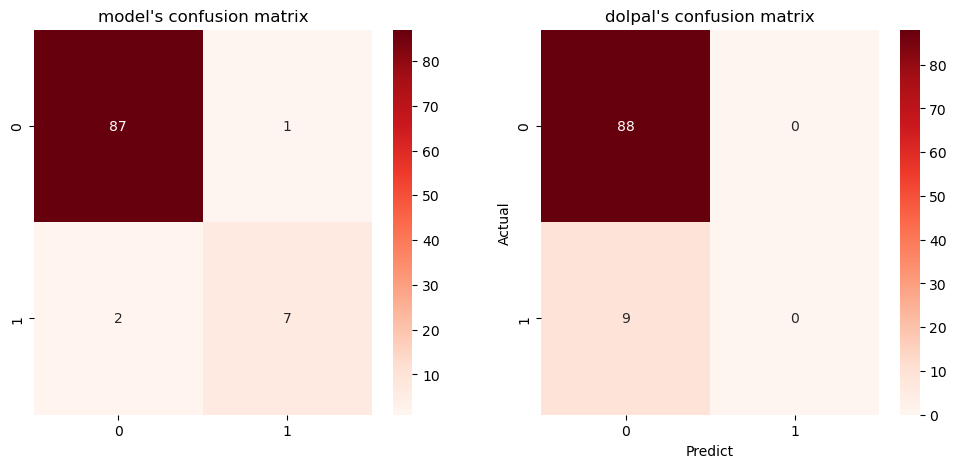

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(121)
ax = sns.heatmap(
    lr_conf_matrix,
    annot=True,
    cmap="Reds"
)
ax.set_title("model's confusion matrix")

plt.subplot(122)
ax = sns.heatmap(
    bad_conf_matrix,
    annot=True,
    cmap="Reds",
)

ax.set_title("dolpal's confusion matrix")

plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

# 정밀도, 재현율 확인
- 정밀도 : 양성으로 예측했을때 실제 맞은 비율
- 재현율 : 실제 양성 데이터를 맞춘 비율

In [17]:
from sklearn.metrics import precision_score,recall_score
# 모델의 정밀도, 재현율
print(f"정밀도 : {precision_score(y_test,y_pred)}")
print(f"재현율 : {recall_score(y_test,y_pred)}")


정밀도 : 0.875
재현율 : 0.7777777777777778


In [18]:
from sklearn.metrics import precision_score,recall_score
# 모델의 정밀도, 재현율
print(f"정밀도 : {precision_score(y_test,bad_pred)}")
print(f"재현율 : {recall_score(y_test,bad_pred)}")

정밀도 : 0.0
재현율 : 0.0


c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 그래서 정확도, 정밀도, 재현율은 언제?
- 정확도 : 단순 `홍보용`
- 정밀도, 재현율 : 내부 지표(개발을 하면서 분석을 하기 위해)

# 정밀도 - 재현율 트레이드 오프

In [21]:
# predict_proba : 각 클래스에 대한 예측 확률 확인
lr_predict_proba = model.predict_proba(X_test)
lr_predict = model.predict(X_test)

print(lr_predict_proba[:3])
print(lr_predict[:3])



[[9.99276150e-01 7.23849844e-04]
 [9.99315580e-01 6.84420485e-04]
 [9.99999986e-01 1.35135250e-08]]
[0 0 0]


Binarizer 클래스 사용하기
- 지정한 threshold보다 작으면 0으로, 크면 1로 분류해주는 클래스
> 후처리

In [23]:
from sklearn.preprocessing import Binarizer

In [25]:
#예시
sample_data = [[0.1,0.7],
    [1.1,0.2],
    [0.3,1.2]
]
# positive의 기준 = 
binarizer = Binarizer(threshold=0.8)

In [26]:
binarizer.fit_transform(sample_data)

array([[0., 0.],
       [1., 0.],
       [0., 1.]])

In [31]:
# 임계값이 0.5(기본)일 때 오차 행렬 확인
lr_pred_proba_1 = model.predict_proba(X_test)[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=0.5)
custom_predict = binarizer.fit_transform(lr_pred_proba_1)
custom_predict

from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test, pred, ax=None):
  confusion = confusion_matrix( y_test, pred)
  precision = precision_score(y_test , pred)
  recall = recall_score(y_test , pred)
  accuracy = accuracy_score(y_test, pred)
  hmap_ax = sns.heatmap(
    confusion,
    annot=True,
    cmap="Reds",
    ax=ax
  )
  hmap_ax.set_title('A: {0:.4f}, P: {1:.4f}, R: {2:.4f}'.format(accuracy , precision ,recall))

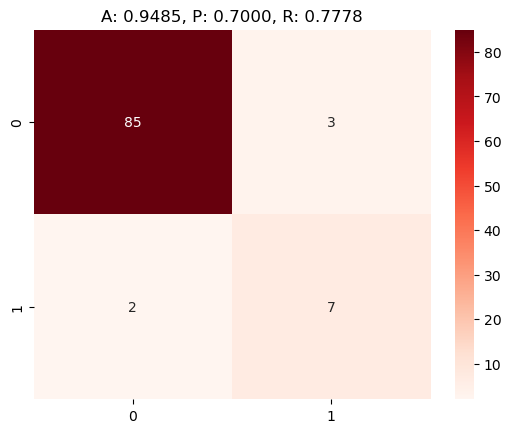

In [32]:
binarizer = Binarizer(threshold=0.1)
custom_predict = binarizer.fit_transform(lr_pred_proba_1)

get_clf_eval(y_test, custom_predict)

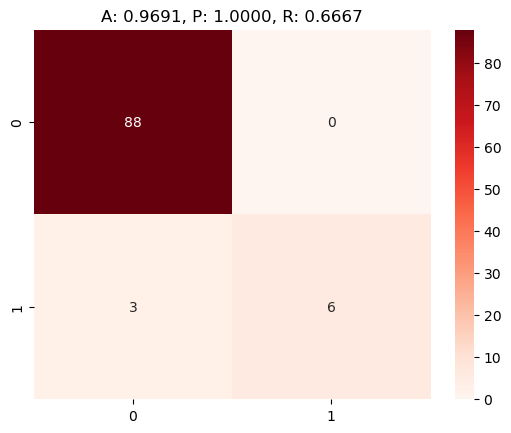

In [34]:
binarizer = Binarizer(threshold=0.8)
custom_predict = binarizer.fit_transform(lr_pred_proba_1)

get_clf_eval(y_test, custom_predict)

c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


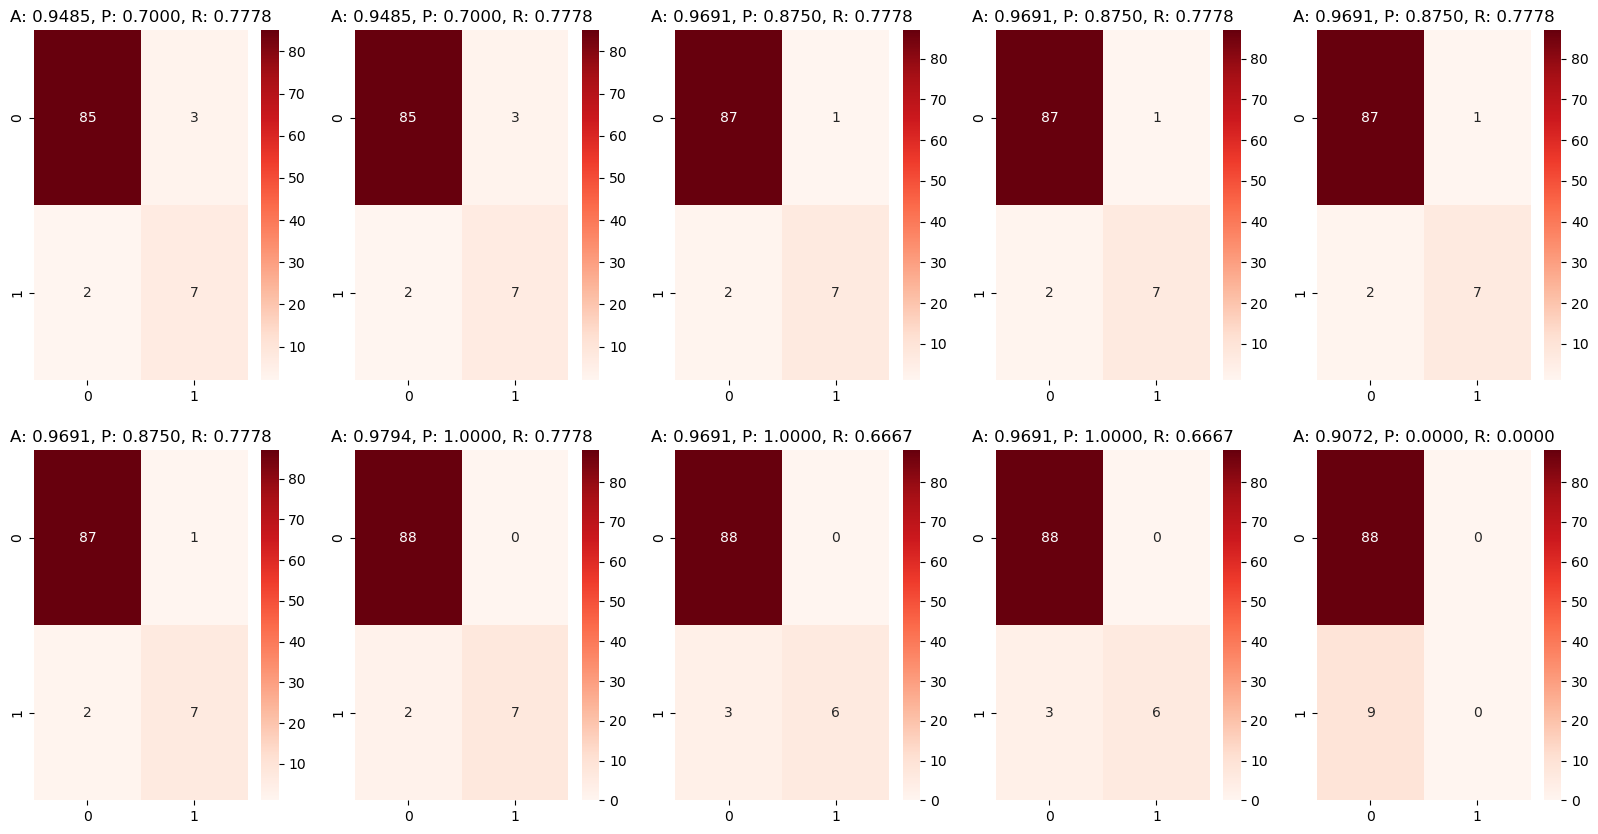

In [36]:
def get_eval_by_threshold(y_test, pred_proba, thresholds):
    fig, axes = plt.subplots(nrows=2, ncols=5)
    fig.set_figwidth(20)
    fig.set_figheight(10)
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold, ax in zip(thresholds, axes.ravel()):
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)

        custom_predict = binarizer.transform(pred_proba)
        get_clf_eval(y_test, custom_predict, ax)
        
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.01, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
get_eval_by_threshold(y_test, lr_pred_proba_1, thresholds )

In [37]:
from sklearn.metrics import f1_score

f1= f1_score(y_test,y_pred)
f1

0.823529411764706

c:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


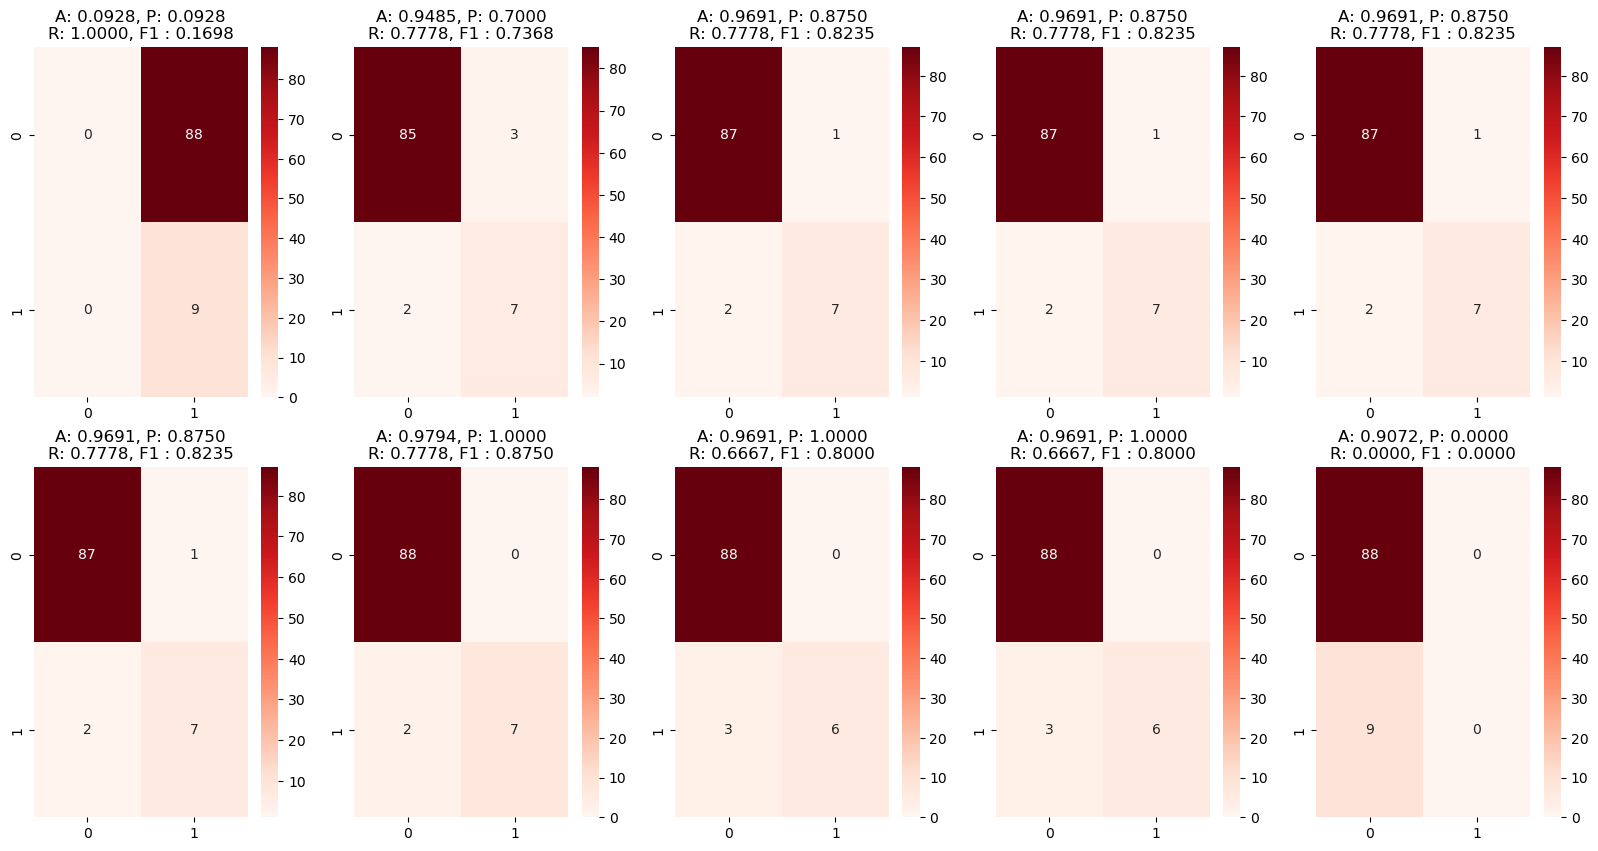

In [38]:
def get_clf_eval(y_test, pred, ax=None):
  confusion = confusion_matrix( y_test, pred)
  precision = precision_score(y_test , pred)
  recall = recall_score(y_test , pred)
  accuracy = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  hmap_ax = sns.heatmap(
    confusion,
    annot=True,
    cmap="Reds",
    ax=ax
  )
  
  hmap_ax.set_title('A: {0:.4f}, P: {1:.4f}\nR: {2:.4f}, F1 : {3:.4f}'.format(accuracy , precision ,recall, f1))
  
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
pred_proba = model.predict_proba(X_test)
get_eval_by_threshold(y_test, lr_pred_proba_1, thresholds)